# Introduction

**Problem Definition**
The Birthday Paradox asks the question: what is the probability p(n) that any two people share a birthday given a group of people of size n. More specifically, we all ask how many people are required to have at least a 50% chance that two people share a birthday, that is p(n) > 0.5.

**Structure of the article**
1. uniform / non uniform distribution
2. mathematical derivation / simulation

**Key takeaways**
This a good example to illustrate the following concepts:
1. Law of Total Probability
2. Chain Rule of probability
3. permutation

In [70]:
# !pip install chaospy
import chaospy

from tqdm import tqdm
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special
# from scipy.special import comb
from math import comb

# Mathematical Derivation

this works for uniform distribution of birthdays

apply the classical approach to probability (geometric approach)


$$V_{n r} =\frac{n !}{(n-k) !}=\frac{365 !}{(365-k) !}$$

$$ V_t =n^k=365^{k} $$
$$ P(A) =\frac{V_{n r}}{V_t} $$
$$ P(B) =1-P(A) $$


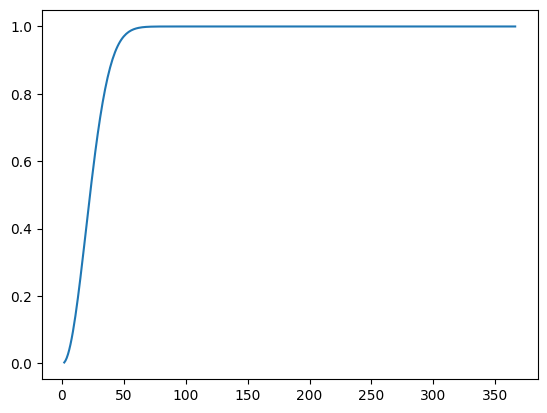

In [116]:
Pb = []

Nperson = 366

for k in range(2,Nperson+1):

    Vnr = int(comb(365, k) * math.factorial(k)) #, exact=True, repetition=True)
    Vt = 365**k
    Pa = Vnr / Vt
    Pb.append( 1 - Pa )

time = np.linspace(2, Nperson, Nperson-1)
plt.plot(time, Pb)

# Simulation Approach

we first define here a the distribution functions that will be then used in the simulation. Both uniform and non-uniform.

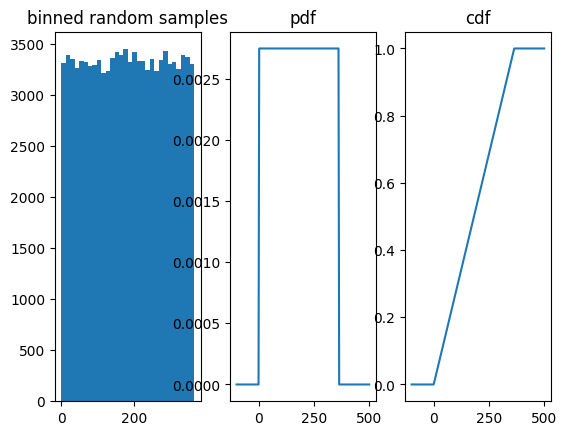

In [5]:
def cdf(x_loc, lo, up):
    """Cumulative distribution function."""
    return (x_loc-lo)/(up-lo)

def lower(lo, up):
    """Lower bounds function."""
    return lo

def upper(lo, up):
    """Upper bounds function."""
    return up


user_distribution = chaospy.UserDistribution(
    cdf=cdf, lower=lower, upper=upper, parameters=dict(lo=0, up=364))


plt.subplot(131)
plt.title("binned random samples")
plt.hist(user_distribution.sample(100000), 30)

plt.subplot(132)
plt.title("pdf")
x_loc = np.linspace(-100, 500, 200)
plt.plot(x_loc, user_distribution.pdf(x_loc))

plt.subplot(133)
plt.title("cdf")
plt.plot(x_loc, user_distribution.cdf(x_loc))

plt.show()

### Simulation of uniform distribution

```python

100%|██████████| 98/98 [00:54<00:00,  1.81it/s]


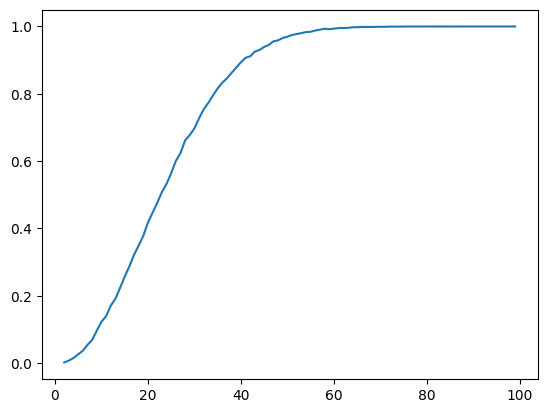

In [3]:

iteration = 10000
duplicate_rate = []
for iGroupSize in tqdm(range(2,100)):
    duplicates_counter = 0
    for i in range(iteration):
        birthdays = np.random.randint(365,size=iGroupSize) # randomize the groups birthdays from 0-364

        uniques, counts = np.unique(birthdays, return_counts=True) # Return the unique birthdays and counts of they appear
        duplicates = uniques[counts > 1] # How many duplicates, or birthdays with counts greater than 1
        duplicates_counter += np.size(duplicates)>0 # Iterate the duplicate counter if there was a duplicate

    duplicate_rate.append(duplicates_counter/iteration) # Compute the probability or fraction of iterations where duplicate occured

# Produce the first simulation plot
plt.plot(range(2,100),duplicate_rate);

In [18]:
np.random.randint(365,size=2)

array([  4, 206])

In [42]:
[range(1,2)]

[range(1, 2)]